## **Introduction to Data Visualization with Python**

Welcome to this hands-on training where we will immerse ourselves in data visualization in Python. Using both `matplotlib` and `seaborn`, we'll learn how to create visualizations that are presentation-ready.

The ability to present and discuss data with non-technical audiences is one of the most important facets of being a succesful Data Scientist. An immensely useful tool for enabling our ability to communicate insights is data visualization, which sits at the intersection of statistics (or more broadly data analysis) and design. In this session, we will be learning how to:

* Create various types of plots, including bar-plots, distribution plots, box-plots and more using `seaborn` and `matplotlib`.
* Format and stylize your visualizations to make them report-ready.
* Create sub-plots to create clearer visualizations and supercharge your workflow.

## **The Dataset**

The dataset to be used in this webinar is a CSV file named `employee_churn_trimmed.csv`, which contains data on employees who quit or stayed at their jobs. The purpose of today's session is to uncover what could be driving churn and present findings in aeshtetically well made plots.


_Employee data:_
- `Age`: Employee Age.
- `Attrition`: Did they churn or no? (`Churned`, `Stayed`).
- `DistanceFromHome`: Distance of office from Employee home in Km.
- `Education`: Degree of college education (`'Bellow College'`, `'College'`, `'Bachelor's degree'`, `'Master's degree'`, `'PhD'`).
- `EducationField`: Field of study.
- `Gender`: Gender of employee (`'Male'`, `'Female'`).
- `MonthlyIncome`: Monthly Income in USD $.
- `PercentSalaryHike`: % increase in salary last year.
- `PerformanceRating`: Rating of Employee Performance (`Low`, `Good`, `Great`, `Excellent`).
- `YearsAtCompany`: Number of years spent at company.

_Survey responses:_
- `EnvironmentSatisfaction`: Rating of Employee Satisfaciton with work environment (`Low`, `Good`, `Great`, `Excellent`).
- `JobInvolvement`: Rating of Employee Job Involvement (`Low`, `Good`, `Great`, `Excellent`).
- `JobSatisfaction`: Rating of Employee Job Satisfaction (`Low`, `Good`, `Great`, `Excellent`).
- `RelationshipSatisfaction`: Rating of Employee Relationships Satisfaction (`Low`, `Good`, `Great`, `Excellent`).
- `WorklifeBalance`: Rating of Employee Work life balance Satisfaction (`Low`, `Good`, `Great`, `Excellent`).


# Importing relevant packages with their aliases
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [0]:
# Read data
employee_churn = pd.read_csv('https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/employee_churned_trimmed.csv?raw=true', index_col = "Unnamed: 0")

In [3]:
# Print header of DataFrame
employee_churn.head()

,Age,Attrition,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,WorkLifeBalance,YearsAtCompany
0,41,Churned,1,College,Life Sciences,Good,Female,Great,Excellent,5993,11,Great,Low,80,Low,6
1,49,Stayed,8,Below College,Life Sciences,Great,Male,Good,Good,5130,23,Excellent,Excellent,80,Great,10
2,37,Churned,2,College,Other,Excellent,Male,Good,Great,2090,15,Great,Good,80,Great,0
3,33,Stayed,3,Master's degree,Life Sciences,Excellent,Female,Great,Great,2909,11,Great,Great,80,Great,8
4,27,Stayed,2,Below College,Medical,Low,Male,Great,Good,3468,12,Great,Excellent,80,Great,2


> #### **Data Visualization Basics I:** _The anatomy of a_ `matplotlib` _figure_
>
> When using a simple `matplotlib` or `seaborn` function like `plt.plot(my_data)`, what `matplotlib` is doing is creating three nested objects in the background. 
>
> * The **figure** object, which could be considered as the canvas-holder, or an object containing all possible axes (plots).
>    * The **axes** object(s), which could be considered as the canvas(es), or the plot where we will be adding our visualizations.
>       * Everything that makes up the plot.
>
<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/stages_plot.png?raw=true" width="65%">
</p>


> - The **figure**, houses in the axes _(which is 1 since it's only one plot)_. 
>    - The **axes** _(Empty plot)_  
>        - Everything that makes up the plot _(Blue line)_
<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/fig.gif?raw=true" width="55%">
</p>


## **Understanding our employee base**

#### **How old is our employee base?**

A great visualization for understanding the distribution of one numerical variable, could be the distribution plot/kernel density estimate. Unlike a histogram, it's not constrained by the amount of bins and better represents the distribution of a variable. 

- `sns.distplot(..., color = "", kde_kws = {}, hist = True)`

  - `color` lets you pick the color of the plot.
  - `kde_kws` is a dictionary that lets you format the KDE curve.
  - `hist` lets you visualize the histogram of the data (`True` or `False`) 



<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/distplot.png?raw=true" width="40%">
</p>




_**Some helper functions used**:_

- `plt.axvline(x, ymin = 0, ymax = 1, linestyle)` lets you add a vertical line to your plot
  - `x`, `ymin` and `ymax` let you place your line.
  - `linestyle` lets you format your line.
- `plt.text(x, y, s, fontsize, style)` lets you add a vertical line to your plot
  - `x`, `y` let you place your line.
  - `s` is the text being written. 
- `plt.xlabel(.., fontsize = , fontweight = )` adds label for x-axis.
- `plt.ylabel(.., fontsize = , fontweight = )` adds label for y-axis.
- `plt.title(.., fontsize = , fontweight = )` adds title.
- `plt.yticks(..)` lets you specify what is displayed on the y-axis.


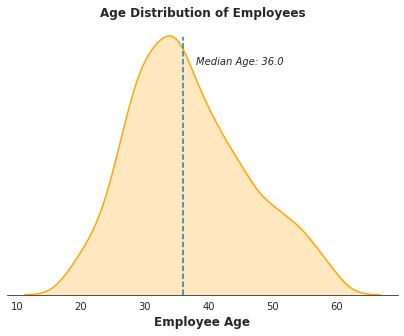

In [14]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize= (7,5))

# Create plot
sns.distplot(employee_churn['Age'], color = 'orange', kde_kws= {'shade':True}, hist = False)


# Add vertical line
plt.axvline(employee_churn['Age'].median(), ymax = 0.95, linestyle = '--')


# Add median age of all employees
plt.text(employee_churn['Age'].median() + 2, 0.04, 'Median Age: ' + str(employee_churn['Age'].median()), 
         style = 'italic', fontsize = 10)

# Despine plot
sns.despine(left = True)

# Add finishing touches
plt.yticks([])
plt.xlabel('Employee Age', fontsize = 12, fontweight = 'semibold')
plt.title('Age Distribution of Employees', fontsize = 14, fontweight = 'semibold')
plt.show()

> #### **Data Visualization Basics II:** _Subplots and multiple axes_
> 
> One of the defining features of creating visualizations with `matplotlib`, is the great level of control offered to create multiple plots at once. As discussed earlier, generating a plot neccessitates the creation of 3 hierarchical objects:
> 
> * The **figure** object, which could be considered as the canvas-holder, or an object containing all possible axes (plots).
>    * The **axes** object(s), which could be considered as the canvas(es), or the plot where we will be adding our visualizations.
>       * Everything that makes up the plot.
> 
> Creating a figure with multiple subplots (axes) is easy, and can be referenced with the following:
> 
> `figure, axes = plt.subplot(nrows = , ncols = , figsize = ...) ` 
> 
> Where we generate a `figure` object and its `axes`. A `figure` can be divided into a grid of rows and columns, where each "cell" in our rows and columns is an axes and we can plot something inside of it. 
> 

<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/subplots.gif?raw=true" width="55%">
</p>

> For example, `figure, axes = plt.subplots(1, 2)` creates a figure with 2 axes vertically on top of each other. The `axes` object is a numpy array where each element is a pointer to an `axes`.
> 
> To create visualiations inside of an `axes`, most visualization functions have an `ax` arguments that lets us decide which visualization belongs on which axes. 
> 
> We can customize the contents of the plot in each `axes` by using `axes` methods that almost the same or similar to how we use helper functions with `plt`. To customize the first `axes` in the example plot above, we use the following: 
> 
> - `plt.xlabel()` --> `axes[0].set_xlabel()`
> - `plt.text()` --> `axes[0].text()`
> 
_There's no need to memorize syntax here or the differences between both `plt` and `axes` methods, just know that the difference exists._

#### **What is the distribution of age, by gender?**

In [0]:
# Subset on males and compute their median age
male_churn = employee_churn[employee_churn['Gender'] == "Male"]
median_male_age = male_churn['Age'].median()

# Subset on females and compute their median age
female_churn = employee_churn[employee_churn['Gender'] == "Female"]
median_female_age = female_churn['Age'].median()

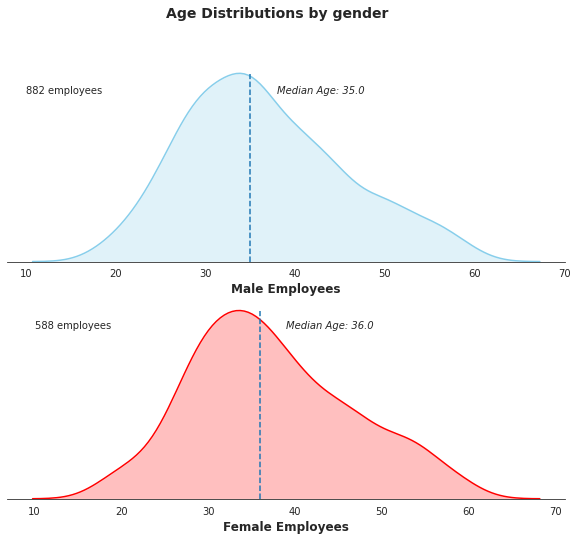

In [28]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
fig, axes = plt.subplots(2,1, figsize = (10,8))

# Create plot of male age distribution on first axes
sns.distplot(male_churn['Age'], color = 'skyblue', kde_kws= {'shade':True}, hist = False, ax = axes[0])

# Add vertical line and annotate median age for male employees on first axes
axes[0].axvline(median_male_age, ymax = 0.95, linestyle = '--')
axes[0].text(median_male_age + 3, 0.04, 'Median Age: ' + str(median_male_age), fontsize = 10, style = 'italic')

# Add number of male employees for context
axes[0].text(10, 0.04, str(male_churn.shape[0]) + ' employees', fontsize = 10)

# Format subplot in first axes
axes[0].set_yticks([])
axes[0].set_xlabel('Male Employees', fontsize = 12, fontweight = 'semibold')

# Create plot of female age distribution on second axes
sns.distplot(female_churn['Age'], color = 'red', kde_kws= {'shade':True}, 
             hist = False, ax = axes[1])

# Add vertical line and annotate median age for female employees on second axes
axes[1].axvline(median_female_age, ymax = 0.95, linestyle = '--')
axes[1].text(median_female_age + 3, 0.04, 'Median Age: ' + str(median_female_age), fontsize = 10, style = 'italic')

# Add number of female employees for context
axes[1].text(10, 0.04, str(female_churn.shape[0]) + ' employees', fontsize = 10)
axes[1].set_yticks([])
axes[1].set_xlabel('Female Employees', fontsize = 12, fontweight = 'semibold')

# Despine visualizations
sns.despine(left = True)

# Figure final formatting
fig.suptitle('Age Distributions by gender', fontsize = 14, fontweight = 'semibold')   
plt.show()

# **Q&A**

#### **What is the education level of our employees by gender?**

A great way to count the distribution of categorical data, is a countplot that can be done as such:

- `sns.countplot(x= , hue= , data= , order=, palette= , alpha=)`
  - `x` is the categorical variable we want to count and `order` lets us set the order of categories visualized
  - `hue` a column we want to group by and categorize by in our visualization 
  - `data` our data source
  - `order` lets us order our `x` categories
  - `palette` and `alpha` let us set color by hue and its transparency

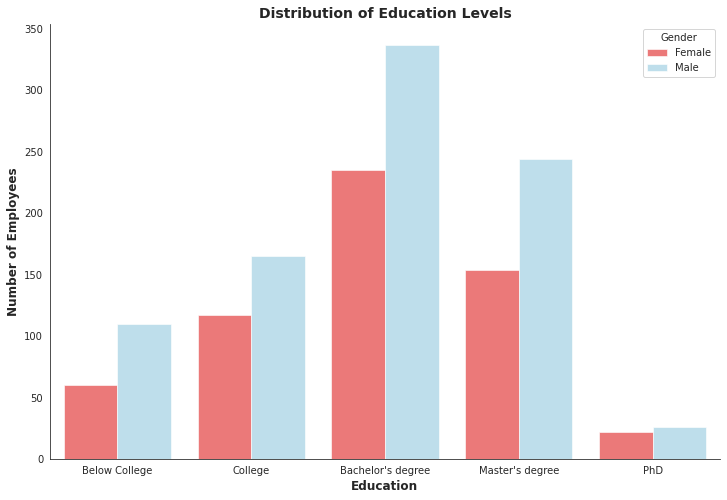

In [35]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (12, 8))

# Create a countplot
sns.countplot(x = 'Education', 
              hue = 'Gender', data = employee_churn, order = ['Below College', 'College', "Bachelor's degree", "Master's degree", 'PhD'], 
              palette = ['red', 'skyblue'], alpha = 0.6)


# Despine visualizations
sns.despine()

# Final styling touches
plt.ylabel('Number of Employees', fontsize = 12, fontweight = 'semibold')
plt.xlabel('Education', fontsize = 12, fontweight = 'semibold')
plt.title('Distribution of Education Levels', fontsize = 14, fontweight = 'semibold')
plt.show()


## **Understanding churners vs non-churners**
#### **Is there a relationship between Age or Distance from Home (KM) and leaving the company?**

A great way to observe the differences between two groups (or categories) of data according to a numeric value is a boxplot, which visualizes the following:

<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>

It can be calculated as such:

- `sns.boxplot(x=, y=, data=, order=, width=, linewidth=, palette=)`
  - `x` is the categorical variable we want to group our data by and `order` lets us set the order categories visualized.
  - `y` is the data being observed by group.
  - `width` and `linewidth` determine the width of the box and the linewidth surrounding it, while `palette` determines color. 

In [0]:
# A note on zip()
first_names = ['Adel', 'Sara', 'Lis']
last_names = ['Nehme', 'Billen', 'Sulmont']

# Zip iterables
for first, last in zip(first_names, last_names):
  print(first, last.upper())

Adel NEHME
Sara BILLEN
Lis SULMONT


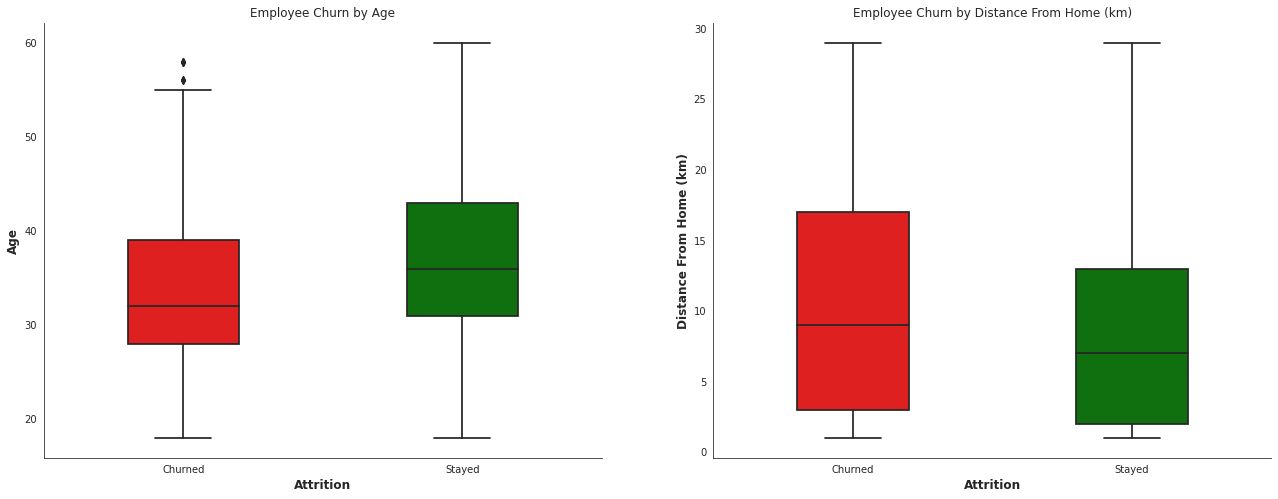

In [94]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
columns_to_plot = ['Age', "DistanceFromHome"]
titles_to_plot = ["Age", "Distance From Home (km)"]

# Create subplots
fig, axes = plt.subplots(1,2, figsize = (22,8))

# Iterate over each axes, and plot a boxplot with relevant columns/titles
for ax, column, title in zip(axes, columns_to_plot, titles_to_plot):

  # Create a boxplot
  sns.boxplot(x = 'Attrition', y = column, data = employee_churn, order = ['Churned', 'Stayed'], ax = ax, width = 0.4, linewidth = 1.75, palette = ['red', 'green'])

  # Despine plot
  sns.despine()

  # Fix final styling for each axes
  ax.set_xlabel('Attrition', fontsize = 12, fontweight = 'semibold')
  ax.set_ylabel(title, fontsize = 12, fontweight = 'semibold')
  ax.set_title('Employee Churn by ' + title)

plt.show()

#### **What do churners vs non-churners think of working for us?**

In [47]:
# Compute proportion of RelationshipSatisfaction by Attrition categories
relationship_attrition = pd.crosstab(employee_churn['RelationshipSatisfaction'], 
                                     employee_churn['Attrition'], normalize = 'index').reset_index()



# Unify proportions as percentages
relationship_attrition[['Churned', 'Stayed']] = relationship_attrition[['Churned', 'Stayed']] * 100
relationship_attrition['Total'] = relationship_attrition['Churned'] + relationship_attrition['Stayed']

# See changes
relationship_attrition

Attrition,RelationshipSatisfaction,Churned,Stayed,Total
0,Excellent,14.814815,85.185185,100.0
1,Good,14.851485,85.148515,100.0
2,Great,15.468410,84.531590,100.0
3,Low,20.652174,79.347826,100.0


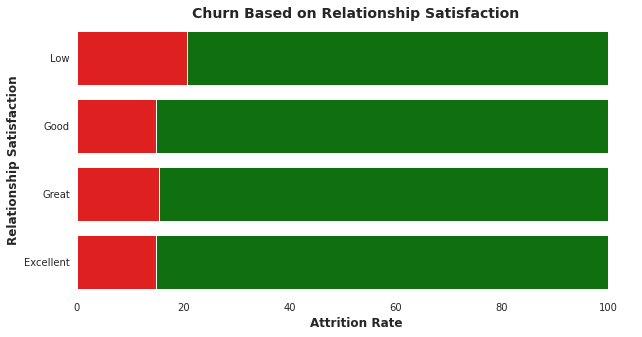

In [54]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (10,5))

# Plot the total percentage of employees first (i.e. 100%)
sns.barplot(x = 'Total', y = 'RelationshipSatisfaction', data = relationship_attrition, 
            order = ['Low', 'Good', 'Great', 'Excellent'], color = 'green')


# Plot the percentage of employees who churned 
sns.barplot(x = 'Churned', y = 'RelationshipSatisfaction', data = relationship_attrition, 
            order = ['Low', 'Good', 'Great', 'Excellent'], color = 'red')

# Despine plot
sns.despine(left = True, bottom = True)

# Final formatting changes
plt.xlabel('Attrition Rate', fontweight = 'semibold', fontsize = 12)
plt.ylabel('Relationship Satisfaction', fontweight = 'semibold', fontsize = 12)
plt.title("Churn Based on Relationship Satisfaction", fontweight = 'semibold', fontsize = 14)
plt.show()

# **Q&A**

Now that we've created one plot using regular `sns.barplot()` and `plt.show()`, we can create a `2x2` **figure** and programatically visualize each survey response in each axes. It's good to note that when defining:

`figure, axes = plt.subplots(2,2)` 

The `axes` object is a 2-d numpy array that looks like this



```
`print(axes)`

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a058acf8>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a053a748>]
 [<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a06dcd68>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a081f3c8>]]
```

To create a 1-d array, we use `.flatten()` like this:

```
print(axes.flatten())

[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a058acf8>
 <matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a053a748>
 <matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a06dcd68>
 <matplotlib.axes._subplots.AxesSubplot object at 0x7fd0a081f3c8>]
```

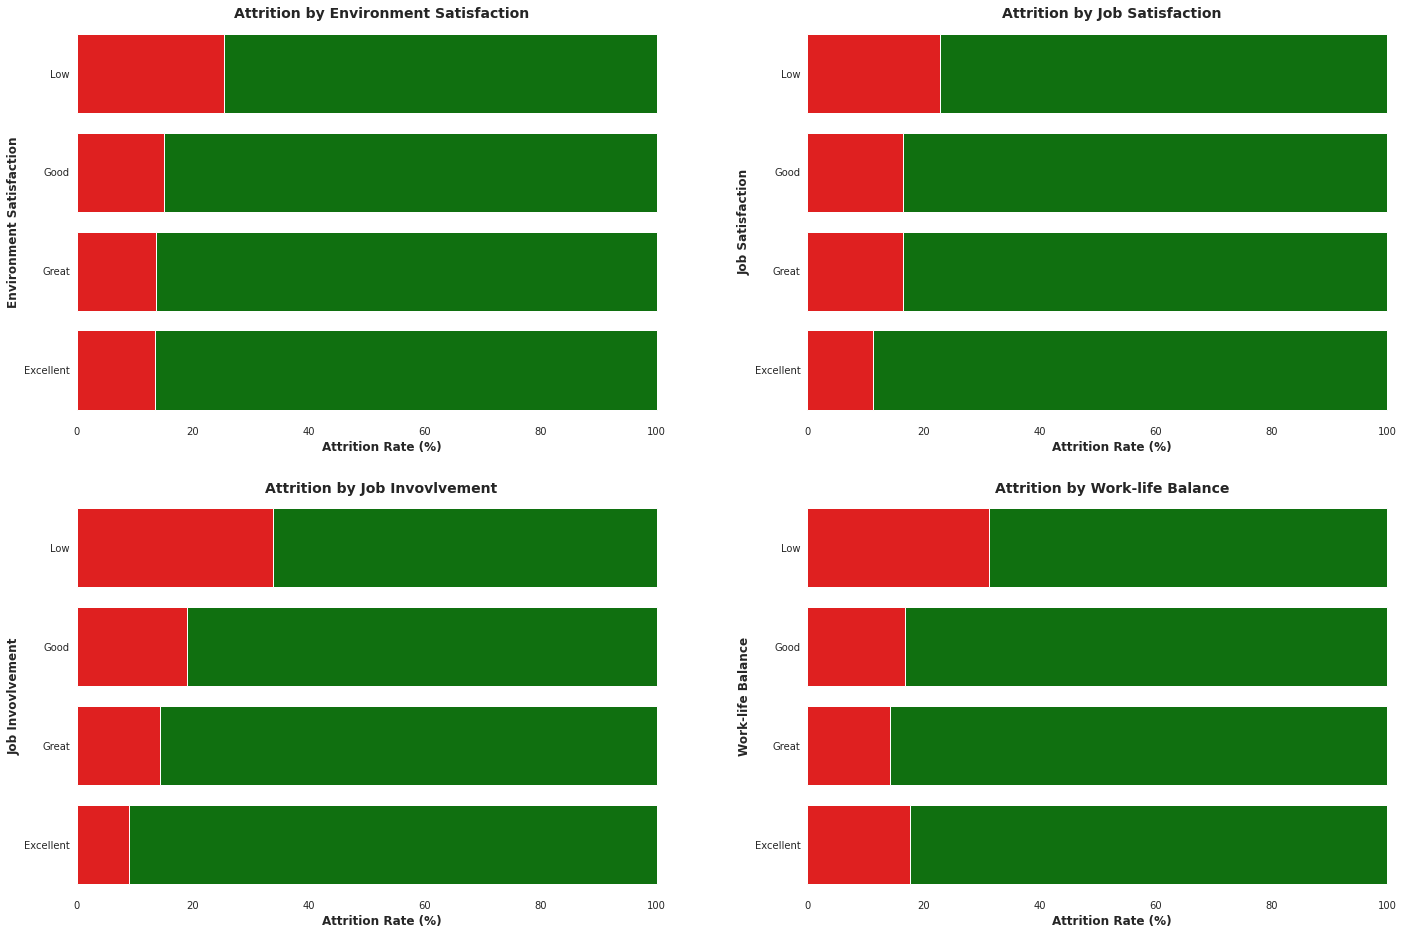

In [63]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
survey_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
survey_titles = ["Environment Satisfaction", "Job Satisfaction", "Job Invovlvement", "Work-life Balance"]

# Create subplots - 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# For every element
for ax, survey_question, survey_title in zip(axes.flatten(), survey_columns, survey_titles):

  # Cross tabulate data and generate proportions for ecah survey question
  proportions = pd.crosstab(employee_churn[survey_question], employee_churn['Attrition'], normalize= 'index').reset_index()

  proportions[['Churned', 'Stayed']] = proportions[['Churned', 'Stayed']] * 100
  proportions['Total'] = proportions['Churned'] + proportions['Stayed']

  # Find percentages instead of proportions
  sns.barplot(x = 'Total', y = survey_question, data = proportions, 
              order = ['Low', 'Good', 'Great', 'Excellent'], color = 'g', 
              ax = ax)


  # Get total column for each survey question
  sns.barplot(x = 'Churned', y = survey_question, data = proportions, 
              order = ['Low', 'Good', 'Great', 'Excellent'], color = 'r', 
              ax = ax)

  # Plot Total plot

  # Plot Churned plot
  
  # Despine plot
  sns.despine(left = True, bottom = True)
  # Set final formatting
  ax.set_title('Attrition by ' + survey_title, fontweight = 'semibold', fontsize = 14)
  ax.set_ylabel(survey_title, fontweight = 'semibold', fontsize = 12)
  ax.set_xlabel('Attrition Rate (%)', fontweight = 'semibold', fontsize = 12)
plt.show()

## **What are initiatives that could decrease churning?**

#### **Do higher salaries create less churn? Is this applicable to all ages?**

Scatterplots are a great way to visualize the relationship between two numeric values - and can be achieved through the following: 

- `sns.scatterplot(x=, y=, hue=, size=, style=, data=, palette=, alpha=)` where:
  - `x`, `y` are column names used on `x` and `y` axis and `data` is the data source
  - `hue` lets us group by a different column, `size` and `style` let us set marker size and respectively by a column.
  - `palette` and `alpha` control color and transperency.


<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/scatterplot.png?raw=true" width="40%">
</p>




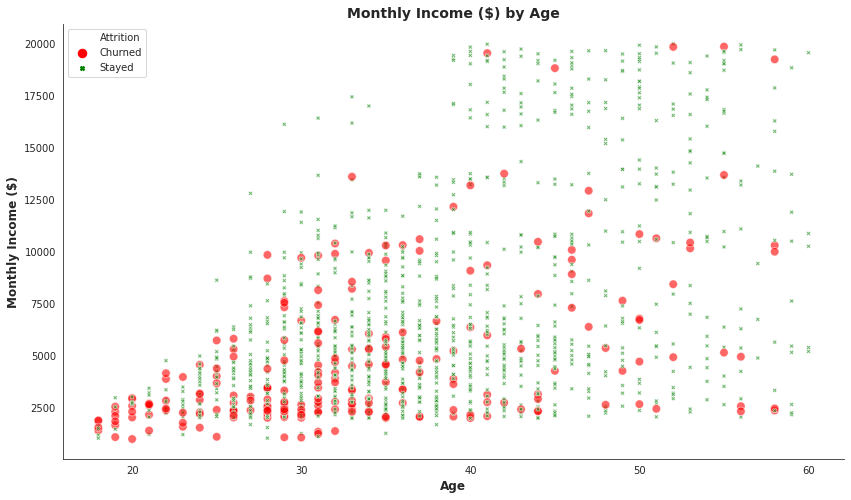

In [89]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(y = 'MonthlyIncome', x = 'Age', hue = 'Attrition', data = employee_churn, size = 'Attrition', style = 'Attrition', palette = ['r', 'g'], alpha = 0.6)

# Despine plot
sns.despine()

# Final formatting touches
plt.xlabel('Age', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Monthly Income ($)', fontsize = 12, fontweight = 'semibold')
plt.title('Monthly Income ($) by Age', fontsize = 14, fontweight = 'semibold')
plt.show()

#### **Did last year's salary increases impact churn?**

Similar to scatteplots, swarmplots are designed to show the relationship and distribution of values for one categorical and one numerical variable. It can be computed as such: 

- `sns.swarmplot(x= , y=, hue=, data=, order=, palette=, size=, alpha=)`
  - `x`, `y` are column names used on `x` and `y` axis and `order` is the order of categories being evaluated
  - `hue` lets us group by a different column.
  - `palette` and `alpha` and `size` control color and transperency and marker size.



<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/swarmplot.png?raw=true" width="40%">
</p>



In [0]:
# Create categories for raises
employee_churn['raise_category'] = pd.cut(employee_churn['PercentSalaryHike'], [10, 15, 20, 25], labels = ['10-15%', '15-20%', '20-25%']) 

In [85]:
employee_churn.dtypes

Age                            int64
Attrition                     object
DistanceFromHome               int64
Education                     object
EducationField                object
EnvironmentSatisfaction       object
Gender                        object
JobInvolvement                object
JobSatisfaction               object
MonthlyIncome                  int64
PercentSalaryHike              int64
PerformanceRating             object
RelationshipSatisfaction      object
StandardHours                  int64
WorkLifeBalance               object
YearsAtCompany                 int64
raise_category              category
dtype: object

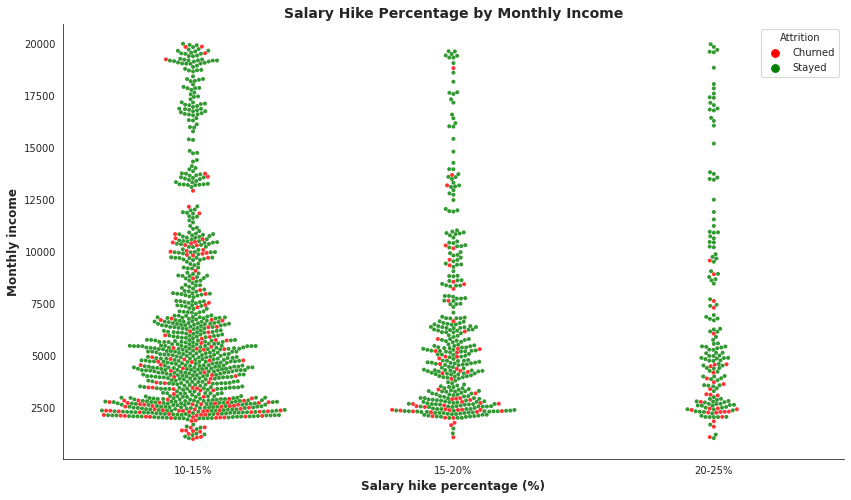

In [77]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create swarmplot
sns.swarmplot(x = 'raise_category', y = 'MonthlyIncome', hue = 'Attrition', 
              data = employee_churn, size = 4, alpha = 0.8, palette = ['r', 'g'])

# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel('Salary hike percentage (%)', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Monthly income', fontsize = 12, fontweight = 'semibold')
plt.title('Salary Hike Percentage by Monthly Income', fontsize = 14, fontweight = 'semibold')
plt.show()

#### **Does the number of years spent at the company affect churn?**

One of the most common visualizations to use is a lineplot, which just draws the relationship between two variables as a line. We can do it with:

- `sns.lineplot(x= , y=, hue=, data=, style =, palette=, size=, markers=, ci =)`
  - `x`, `y` are column names used on `x` and `y` axis. 
  - `hue` lets us group by a different column and `style` lets you adjust line style by categories in a column. 
  - `palette` and `markers` and `ci` control color, whether to add points to your lines, and whether to add a confidence interval to your line.

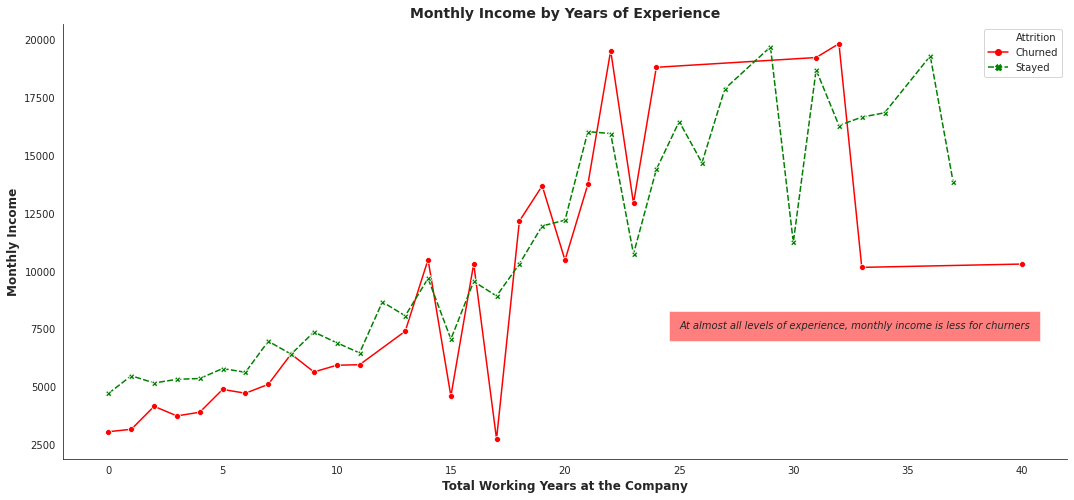

In [82]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (18, 8))

# Create a lineplot
sns.lineplot('YearsAtCompany', y = 'MonthlyIncome', hue = 'Attrition', style = 'Attrition', data = employee_churn,
             palette = ['r', 'g'], markers = True, ci = None)

# Add text to elaborate on plot insights
plt.text(25, 7500, 'At almost all levels of experience, monthly income is less for churners', 
         fontsize = 10, style = 'italic', bbox = {'facecolor':'red', 'alpha':0.5, 'pad':10})

# Despine plot
sns.despine()
# Final formatting
plt.xlabel('Total Working Years at the Company', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Monthly Income', fontsize = 12, fontweight = 'semibold')
plt.title('Monthly Income by Years of Experience', fontsize = 14, fontweight = 'semibold')

plt.show()

# **Q&A**